**Caracterización Atmosférica de Cuerpos Celestes mediante Análisis de Fourier:** El equipo realizará un estudio del espectro de radiación electromagnética emitido por un cuerpo celeste, aplicando la transformada de Fourier para analizar las variaciones en la luz observada. Este análisis permitirá caracterizar las propiedades atmosféricas del cuerpo, como su composición química y las fluctuaciones de temperatura, a partir de los patrones espectrales identificados en los datos.

Análisis Principales:

1. Obtención de datos espectrales: Investigar diversas bases de datos para extraer información sobre los espectros de radiación electromagnética provenientes de cuerpos celestes.
2. Conjunto de datos inicial: Leer el archivo data.xlsx y graficar la radiación solar en función del tiempo utilizando la biblioteca pandas.
3. Aplicación de la Transformada de Fourier: Emplear la transformada discreta de Fourier (mediante las funciones de numpy o scipy) para analizar la señal obtenida.
4. Identificación de los picos (peaks): Utilizar la función find peaks para localizar los picos relevantes en la Transformada Rápida de Fourier (FFT).
5. Análisis de bandas de absorción: Investigar las bandas de absorción características de elementos como el hidrógeno y el helio, identificando las frecuencias en las que ocurren dichos fenómenos de absorción.
6. Comparación entre bandas de absorción y FFT: Comparar las bandas de absorción identificadas con los resultados obtenidos mediante la Transformada de Fourier para determinar correlaciones y patrones que puedan revelar información sobre la composición química y propiedades atmosféricas del cuerpo celeste analizado.

<div style="background-color: #00ffeac0; color: black; padding: 10px; border-radius: 5px; max-width: 98%;">

---
### **Importación de librerías**

---

</div>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq

<div style="background-color: #00ffeac0; color: black; padding: 10px; border-radius: 5px; max-width: 98%;">

---
### **Parte 2**

Lectura del archivo y grafico de la radiación solar en función del tiempo.

---

</div>

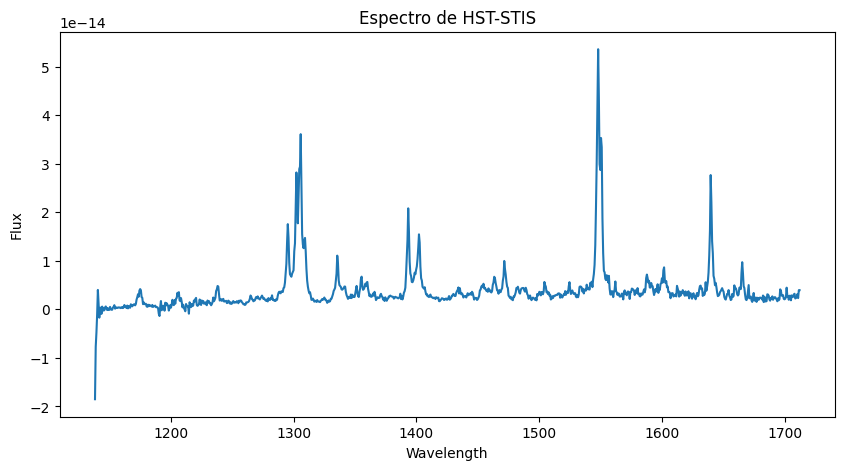

Se graficó el espectro debido a que los datos obtenidos tienen flujo no radiación solar


In [ ]:
# Se lee el archivo
file = '-'
with fits.open(file) as fitFile:
    data = fitFile[1].data
    wavelength = data['WAVELENGTH'][0]
    flux = data['FLUX'][0]

# Se definen las variables por medio de Pandas
df = pd.DataFrame({
    'wavelength': wavelength,
    'flux': flux
})

# Se grafica el espectro
plt.figure(figsize=(10,5))
plt.plot(df['wavelength'], df['flux'])
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Espectro de HST-STIS")
plt.show()

print("Se graficó el espectro debido a que los datos obtenidos tienen flujo no radiación solar")

<div style="background-color: #00ffeac0; color: black; padding: 10px; border-radius: 5px; max-width: 98%;">

---
### **Parte 3 y 4**

Aplicación de la transformada de Fourier e identificación de los picos.

---

</div>

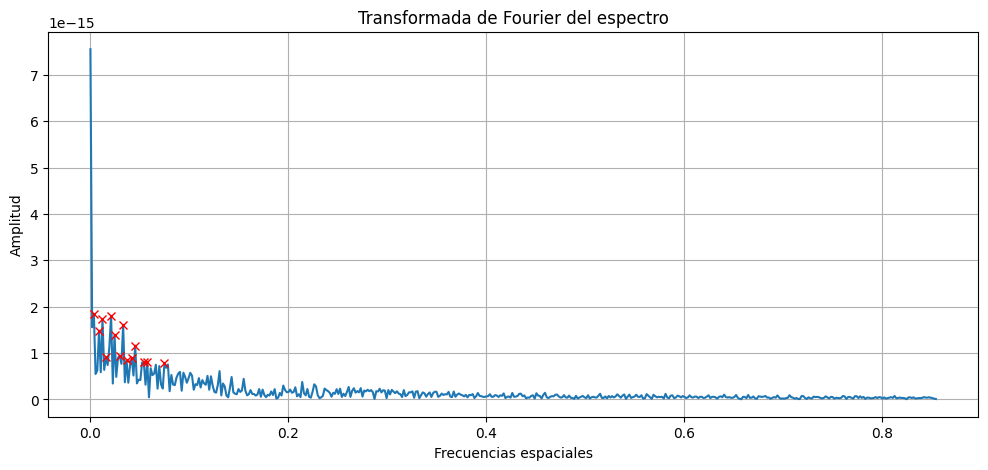

In [7]:
# Se define la grilla uniforme para trabajar la transformada
X = np.linspace(wavelength.min(), wavelength.max(), len(wavelength))
Y = np.interp(X, wavelength, flux)

# Se calcula la transformada
yf = fft(Y)
xf = fftfreq(len(wavelength), (X[1] - X[0])) # Se trabaja por medio de éste módulo debido a que no conocemos los valores de tiempo, por lo que para que sean pasos homogéneos se utiliza fftfreq

# Nos interesa sólo la mitad positiva del espectro (ya que la otra mitad es igual)
positive_frequencies = xf[:len(wavelength)//2]
amplitude = 2/len(wavelength) * np.abs(yf[:len(wavelength)//2]) # Se aplica normalización

plt.figure(figsize=(12, 5))
plt.plot(positive_frequencies, amplitude)
plt.title("Transformada de Fourier del espectro")
plt.xlabel("Frecuencias espaciales")
plt.ylabel("Amplitud")
plt.grid(True)

peaks, _ = find_peaks(amplitude, height=np.max(amplitude)*0.1)
plt.plot(positive_frequencies[peaks], amplitude[peaks], "x", color="r")
plt.show()

<div style="background-color: #00ffeac0; color: black; padding: 10px; border-radius: 5px; max-width: 98%;">

---
### **Parte 5**

Identificación de las bandas de absorción para el hidrógeno y el helio.

---

</div>

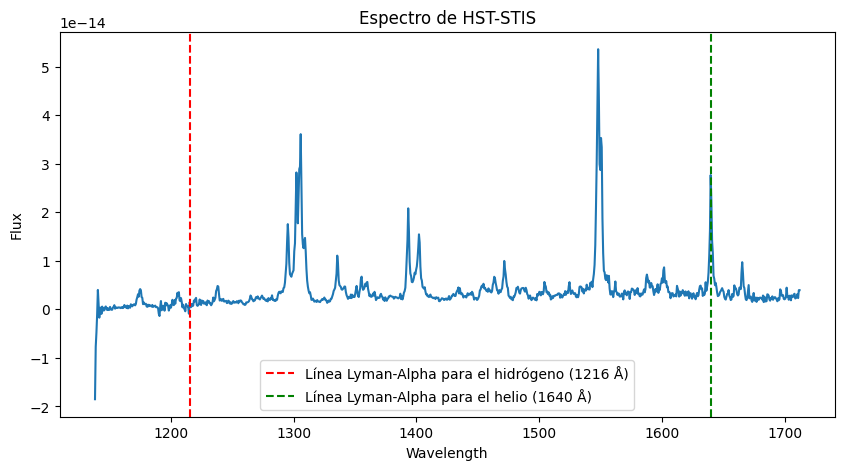

In [8]:
# A partir de lo obtenido en la parte 2
plt.figure(figsize=(10,5))
plt.plot(df['wavelength'], df['flux'])
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.title("Espectro de HST-STIS")
plt.axvline(x=1216, color="r", linestyle="--", label="Línea Lyman-Alpha para el hidrógeno (1216 Å)")
plt.axvline(x=1640, color="g", linestyle="--", label="Línea Lyman-Alpha para el helio (1640 Å)")
plt.legend()
plt.show()